# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Model Capacity
- import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
  - 'Electric.csv' from Github

In [4]:
#github 에서 바로 파일을 읽어오기 (주의: raw 주소를 사용해야함)
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


- 산점도(surface_area vs. electricity)

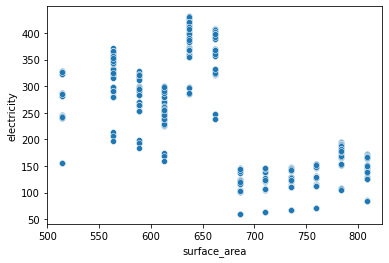

In [6]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

### 1) 1차 모델 시각화

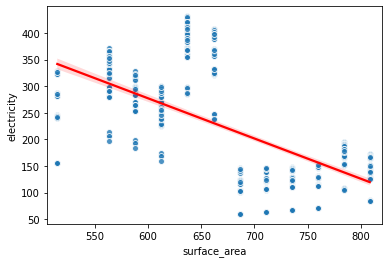

In [7]:
sns.regplot(x = 'surface_area' , y = 'electricity', data = Elec, 
            line_kws = {'color' : 'red'} ,
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

### 2) 2차 모델 시각화

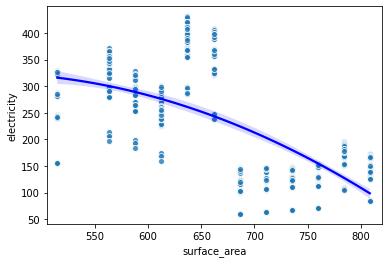

In [8]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'blue'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 2)
plt.xlim(505, 820)
plt.show()

### 3) 5차 모델 시각화

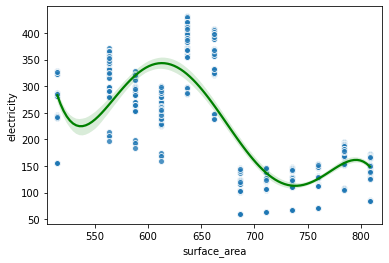

In [9]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'green'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 5)
plt.xlim(505, 820)
plt.show()

## 4) 9차 모델 시각화

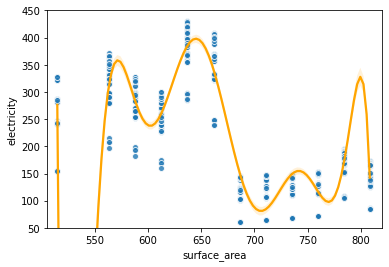

In [10]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec ,
            line_kws = {'color' : 'orange'} ,
            scatter_kws = {'edgecolor' : 'white'} ,
            order = 9)

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

## 5) 4개 모델 비교 시각화

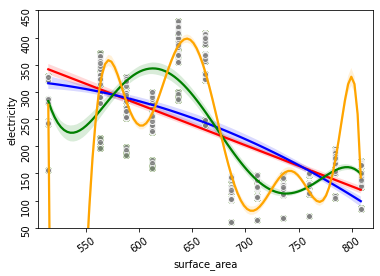

In [14]:
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'red'})
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'blue'}, order = 2)
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'green'}, order = 5)
sns.regplot(x = 'surface_area' , y = 'electricity' , data = Elec , line_kws = {'color' : 'orange'}, order = 9 ,
            scatter_kws = {'color' : 'gray' , 'edgecolor' : 'white'})

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

### 6) ipywidgets Package
- reg_plot() 선언

In [15]:
def reg_plot(x) :
  sns.regplot(x = 'surface_area' ,
              y = 'electricity' ,
              data = Elec ,
              order = x ,
              line_kws = {'color' : 'red'} ,
              scatter_kws = {'edgecolor' : 'white'})
  
  plt.xlim(505, 820)
  plt.ylim(50, 450)
  plt.show()

- interact() 실행

In [16]:
from ipywidgets import interact

order = [1, 2, 5, 9]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9), value=1), Output()), _dom_classes=('widg…

<function __main__.reg_plot>